# Table of contents


1.   Loading librarys
2.   Reading the Dataset
3.   Data analysis
4.   Exploratory Data Analysis
      * Finding Null values in data set
      * Filling the Null values
      * Drop function
5.   Data visualization
      * Histogram plots
      * Barplots (using groupby function)
      * Pie plot
      * Violin plots
6.   multivariate analysis    
      * Pair plots
      * Heatmaps
      * Box plots
7.   Encoding
8.   Feature Scaling
      * MinMaxScaler
9.   Data spliting
      * spliting
10.  Algorithm
      * Random Forest
11.  Hyperparameter tuning
      * Grid Search
12.  classification models
      * Confusion matrix
      * classification report
      * fscores
      * Bar plot
13.   Receiver Operating Characteristic (ROC)
14.   K-Nearest Neighbors (KNN)
15.   Additional Algorithm's
      * LogisticRegression
      * DecisionTreeClassifier
      * GaussianNB
      * SVC
16.   Cross validation


# 1. Loading **librarys**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the **Dataset**

In [61]:
df=pd.read_csv('/content/apple_quality.csv') #This code loads data from the specified CSV file (apple_quality.csv) into a DataFrame named df.
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# 3. Data analysis

In [62]:
df.head() # allows us to quickly inspect the structure and contents of a DataFrame by displaying the first few rows.

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [63]:
df.tail() # allows us to quickly inspect the structure and contents of a DataFrame by displaying the last few rows.

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [64]:
df.sample(5) # allows us to randomly select a subset of rows from the DataFrame. This can be useful for various purposes, such as generating random samples for exploratory data analysis or creating random training and testing datasets for machine learning models.

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
621,621.0,-0.976026,-4.201243,-1.680633,1.546068,-1.330250,2.643543,-4.007585958,bad
2952,2952.0,1.004742,-1.654690,-0.294946,2.194853,-0.295615,2.513655,0.253906147,good
2415,2415.0,-4.784914,-0.602437,1.405474,0.052518,0.562506,1.620126,-0.965657546,bad
975,975.0,-0.977650,-0.305416,-1.862191,0.183797,3.301545,0.728022,2.74473663,bad
294,294.0,0.497028,-4.501008,-0.720715,3.177122,2.536147,-2.032103,3.350155927,good


In [65]:
df.info() # displays the data types of each column in the DataFrame. This is helpful for understanding the nature of the data and ensuring that the correct data types are assigned to each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [66]:
df.describe() # is a valuable method for generating summary statistics and gaining insights into the numerical aspects of the data within a DataFrame.

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [67]:
df.columns # is a versatile attribute that provides access to the column labels of a DataFrame.

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [68]:
df.dtypes # allows us to quickly inspect the data types of each column in the DataFrame.

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

# 4. **Exploratory Data Analysis**





1.   Finding Null values in data set
2.   Filling the Null values




In [69]:
df.isnull().sum() # is a valuable method for quantifying missing values in a DataFrame.

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

Note: **here only the last row consists of null values, so by using the index of that row, i dropped that particular row**

In [70]:
index_to_remove = 4000
df.drop(index_to_remove, inplace=True)

Note: After dropping the last row there are no object in Acidity column, so converting it into float

In [71]:
df['Acidity'] = df['Acidity'].astype('float64') # 'astype' is to convert the data type of a column to a different data type.

In [72]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [73]:
df.drop(columns=['A_id'],inplace=True) # 'drop' is commonly used to remove rows or columns with missing or irrelevant data. This helps clean up the dataset and improve its quality for analysis or modeling.

In [74]:
df.corr() # df.corr() calculates the correlation coefficient between pairs of columns, indicating the strength and direction of the linear relationship between them.

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


# 5. Data visualization

# Histogram plots
1. Histograms provide a visual representation of the distribution of a continuous variable. They allow us to see how the values are spread across different ranges or bins, revealing patterns such as symmetry, skewness, or multimodality.




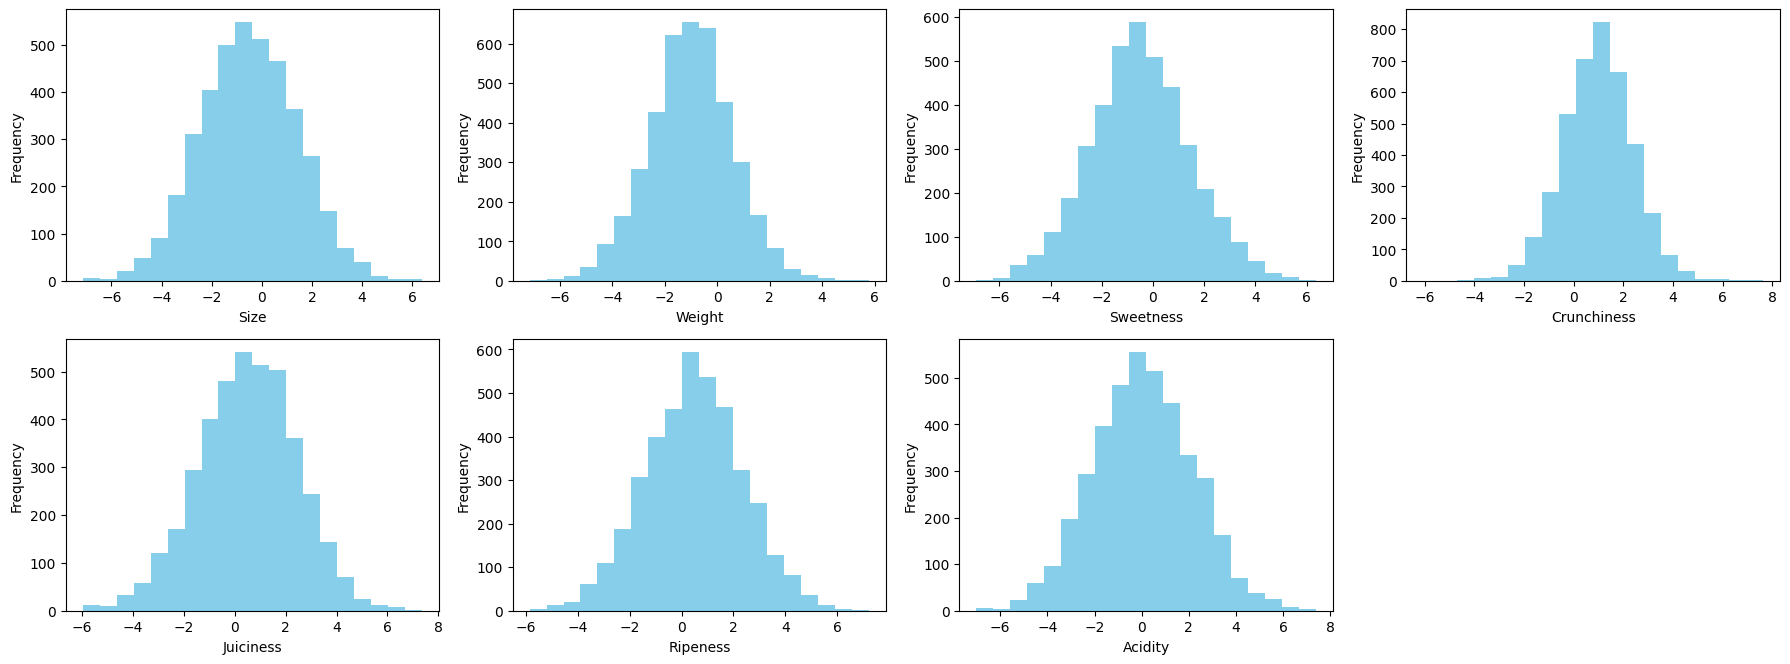

In [75]:
flo = (df.dtypes == 'float64')
flo_cols = list(flo[flo].index)

plt.figure(figsize=(18, 36))
index = 1

for col in flo_cols:
    plt.subplot(11, 4, index)
    plt.hist(df[col], bins=20, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

* The above graph tells the maximum apples count of the size,weight,sweetness,crunchiness,juiciness,Ripeness.



# Barplots

*   Barplots are a type of data visualization used to represent categorical data, where the height or length of bars corresponds to the frequency or proportion of each category.



<Axes: xlabel='Quality'>

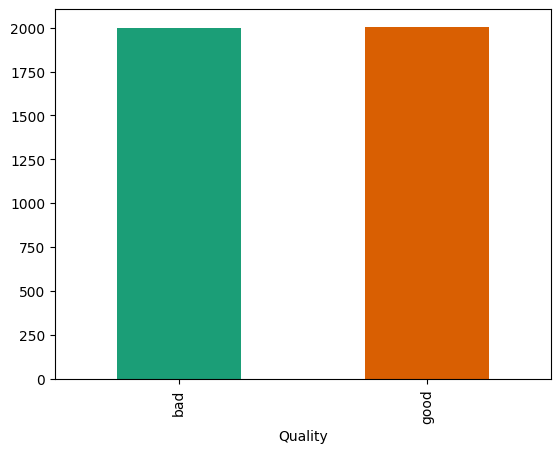

In [76]:
df.groupby('Quality').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2')) #this code is grouping the DataFrame by the 'Quality' column, counting the occurrences of each quality level, and then creating a bar plot to visualize the distribution of quality levels in the data, with customized colors for the bars using Seaborn's 'Dark2' color palette.

# Pie plot

*   Pie plots provide a clear visual representation of how parts of a whole relate to each other. Each "slice" of the pie represents a proportion of the total, making it easy to understand the relative sizes of different categories.

*   Pie charts make it easy to compare the sizes of different categories within a dataset. By looking at the angles or areas of the slices, viewers can quickly discern which categories are larger or smaller.



<Axes: ylabel='Quality'>

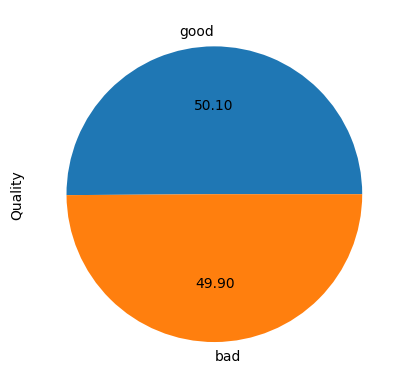

In [77]:
df['Quality'].value_counts().plot(kind='pie', autopct='%.2f')

# Violin plots
* Violin plots are a type of data visualization that combines aspects of a box plot and a kernel density plot. They are useful for comparing the distribution of a numeric variable across different categories.

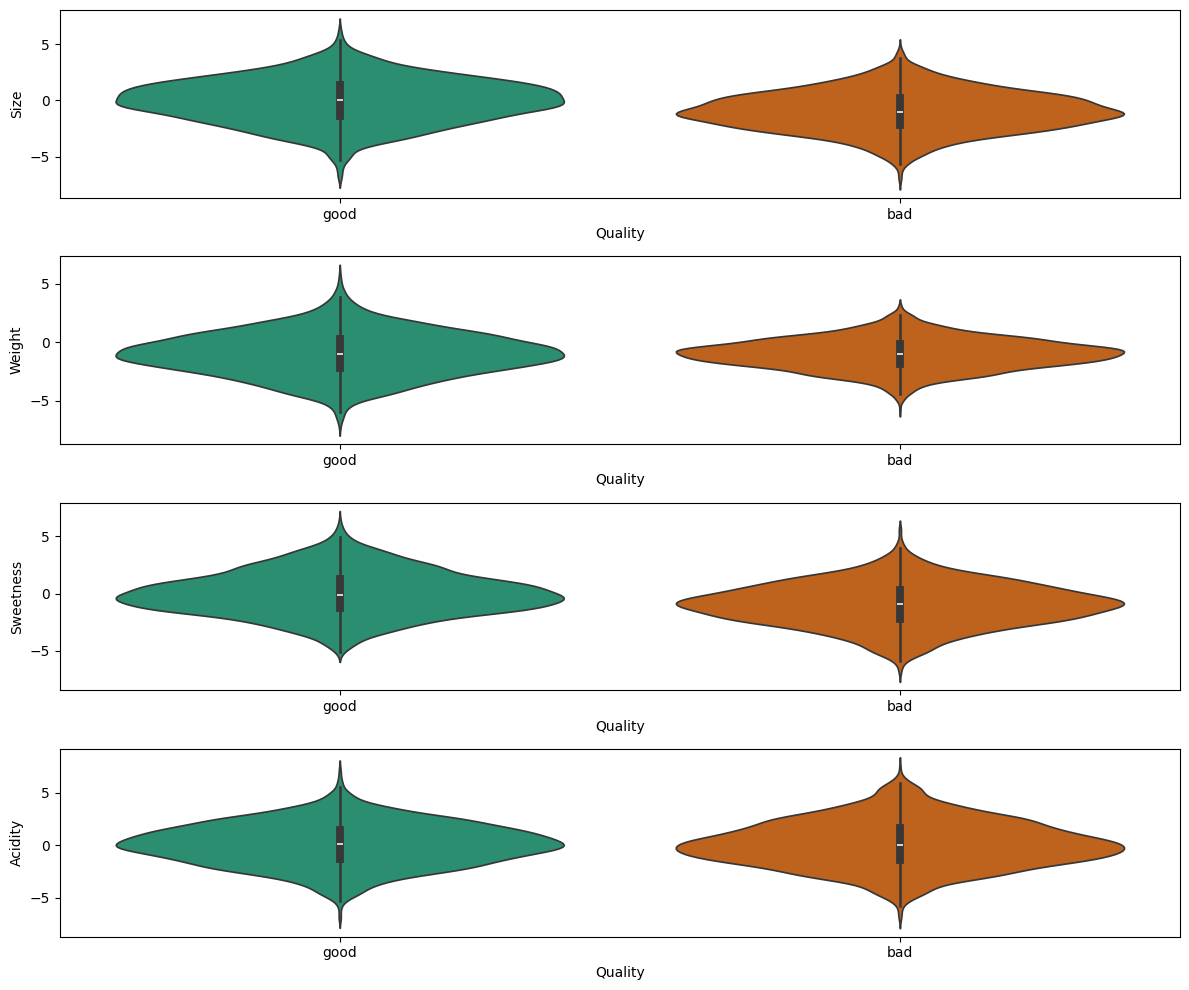

In [78]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
sns.violinplot(df, x='Quality', y='Size', inner='box', palette='Dark2')

plt.subplot(4, 1, 2)
sns.violinplot(df, x='Quality', y='Weight', inner='box', palette='Dark2')

plt.subplot(4, 1, 3)
sns.violinplot(df, x='Quality', y='Sweetness', inner='box', palette='Dark2')

plt.subplot(4, 1, 4)
sns.violinplot(df, x='Quality', y='Acidity', inner='box', palette='Dark2')
plt.tight_layout()
plt.show()

# 6. Multivariate analysis

# Pair plots
* Pair plots, also known as scatterplot matrices, are a type of data visualization that provides a comprehensive view of relationships between pairs of variables in a dataset. Here's why we use pair plots:


1.   **Identifying patterns and correlations**: Pair plots help identify patterns, trends, and correlations between variables. By examining the scatterplots and histograms along the diagonal of the pair plot matrix, we can identify linear or nonlinear relationships, as well as understand the distributions of individual variables.
2.   **Assessing multicollinearity**: Pair plots are useful for assessing multicollinearity, which occurs when two or more variables are highly correlated with each other.



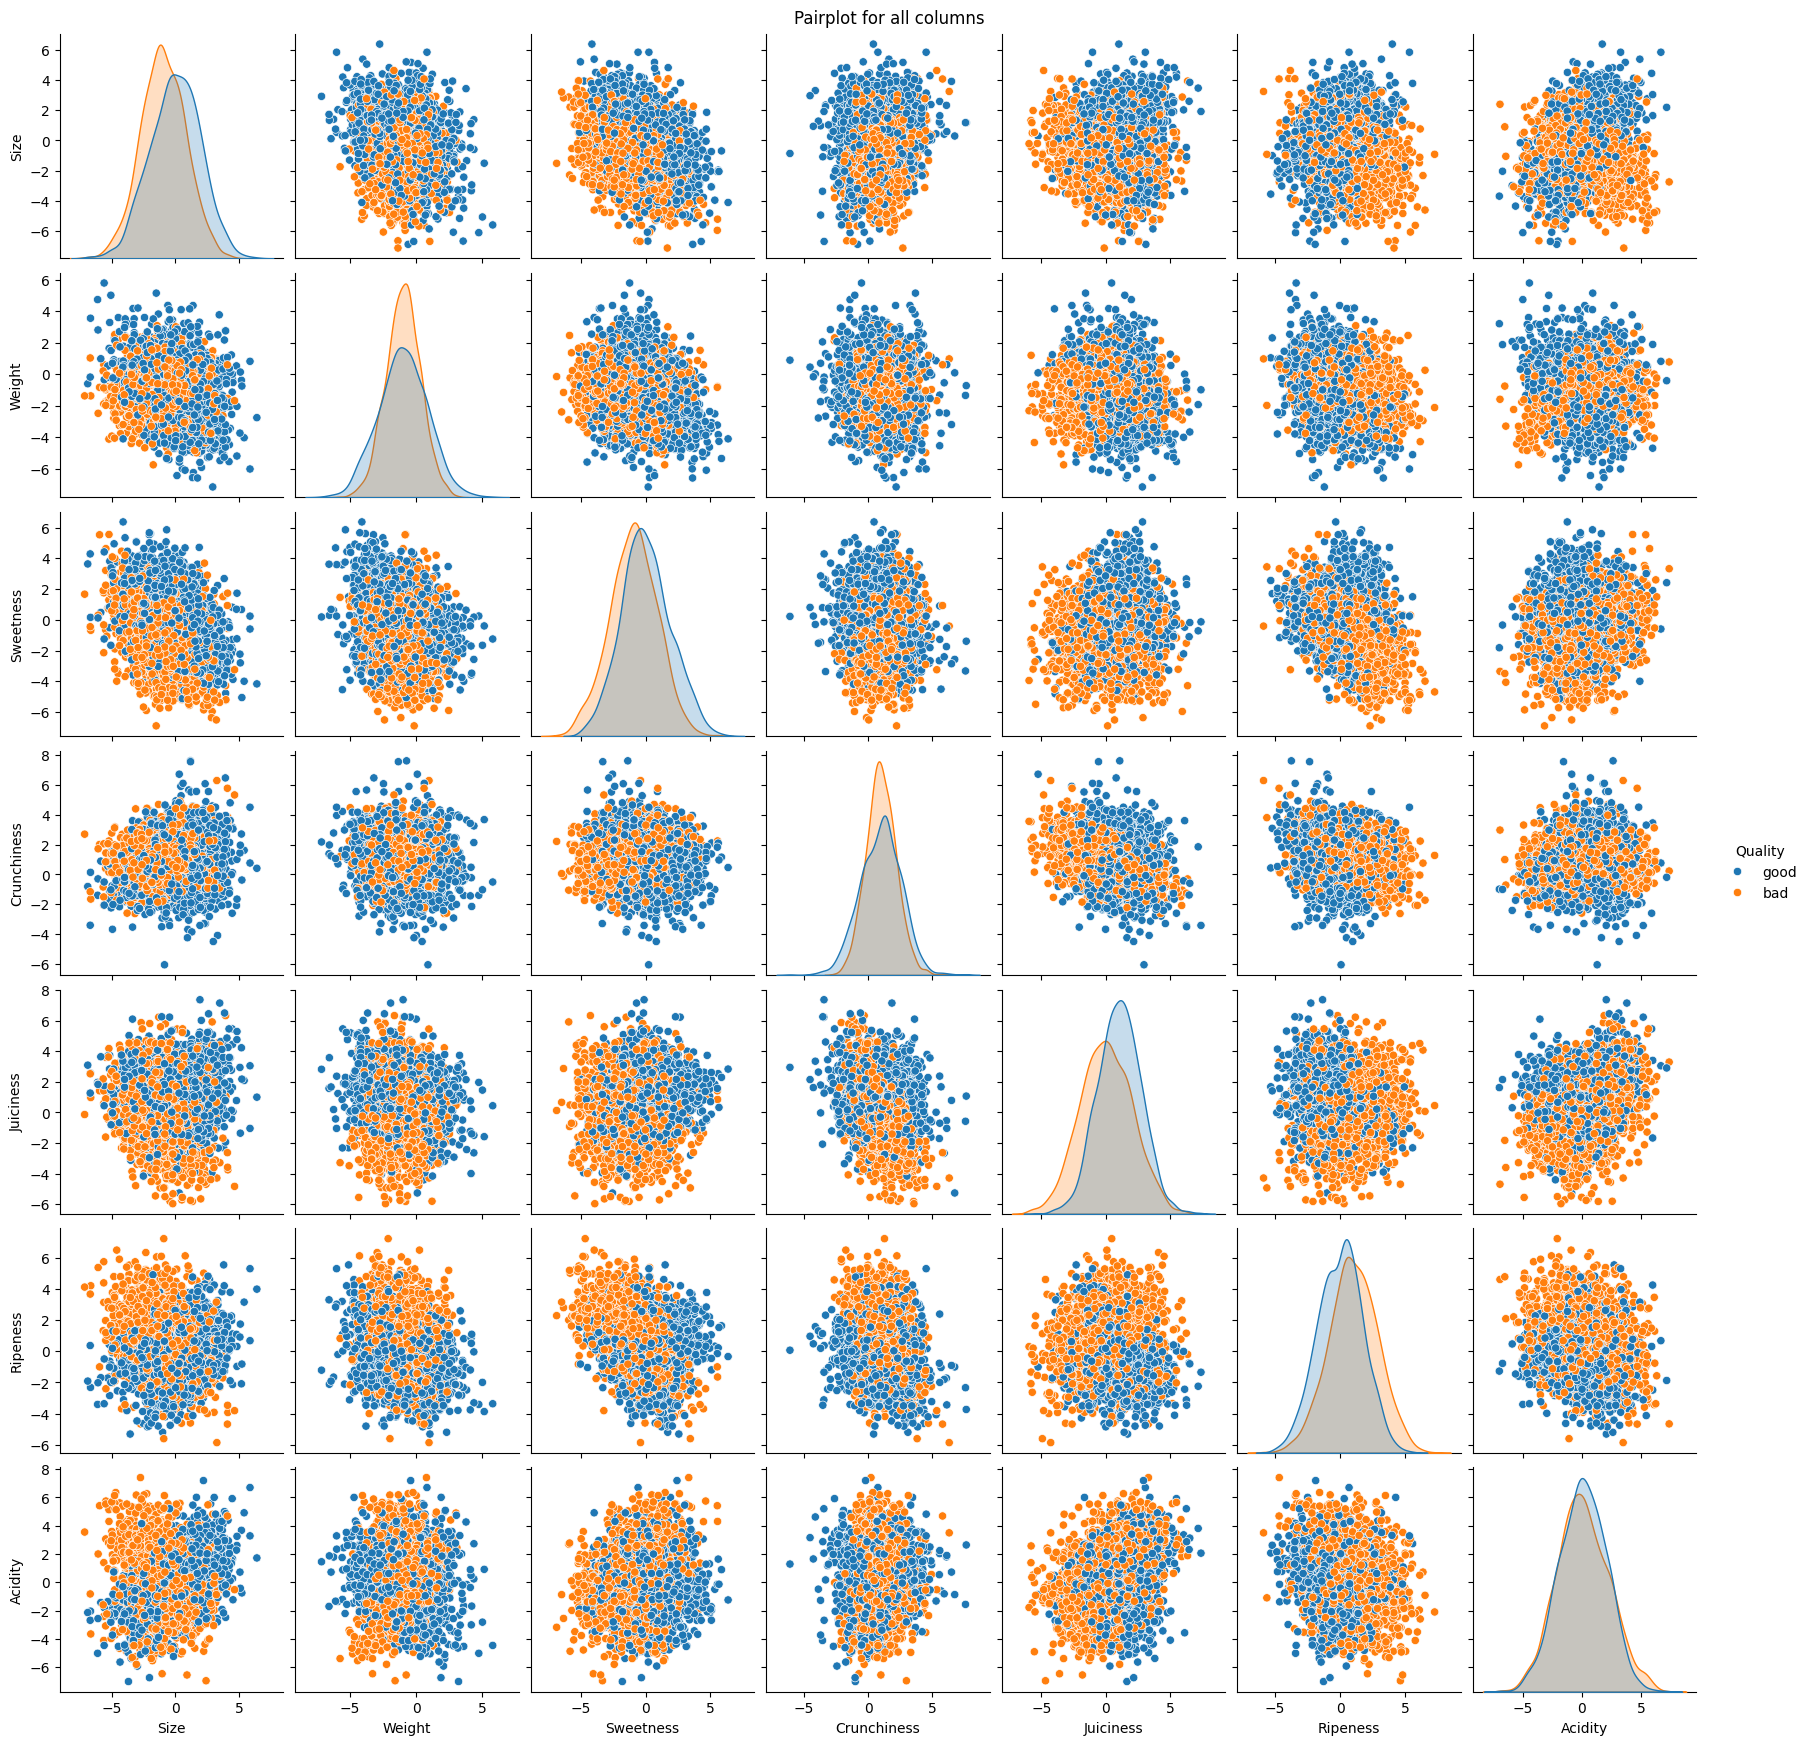

In [79]:
sns.pairplot(df, hue='Quality')
plt.suptitle('Pairplot for all columns',y=1)
plt.show()

# Heatmaps

1.   Visualizing relationships in tabular data: Heatmaps are particularly useful for visualizing relationships in tabular data by representing each cell's value with a color. This allows us to quickly identify patterns, trends, and relationships within the data.

2.   Correlation analysis: Heatmaps are commonly used to visualize correlation matrices, where each cell represents the correlation coefficient between two variables. By using a color scale to represent the strength and direction of correlations, heatmaps make it easy to identify strong, weak, positive, and negative correlations.





<Axes: >

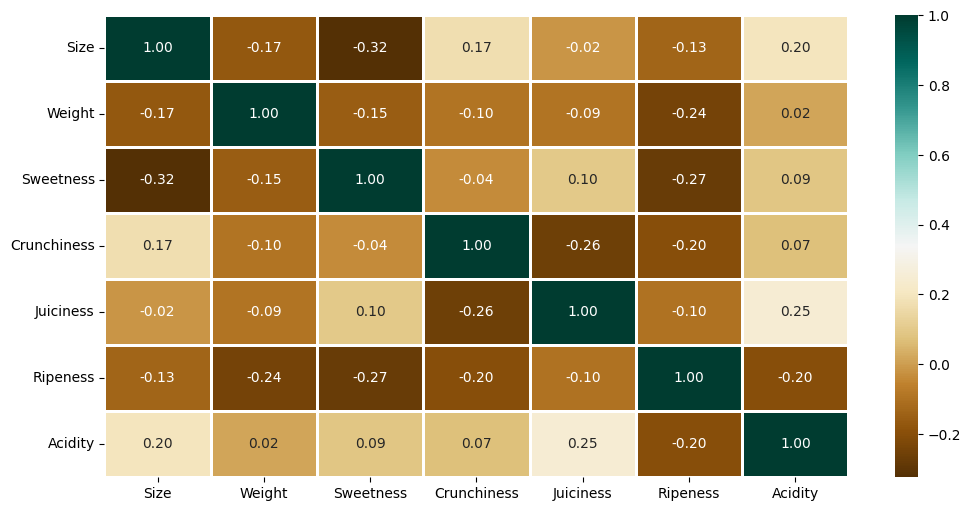

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Box plots


1.   **Visualizing distribution**: Box plots provide a visual summary of the distribution of a continuous variable, including its central tendency, spread, and shape. The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data, while the whiskers extend to the minimum and maximum values within a certain range or are defined using statistical criteria.

2.   **Detecting skewness and outliers**: Box plots help identify skewness and outliers in the data. Skewness is evident if the median line is not centered within the box, while outliers are represented as individual data points beyond the whiskers of the plot. Outliers are important to identify as they can significantly affect statistical analyses and model performance.



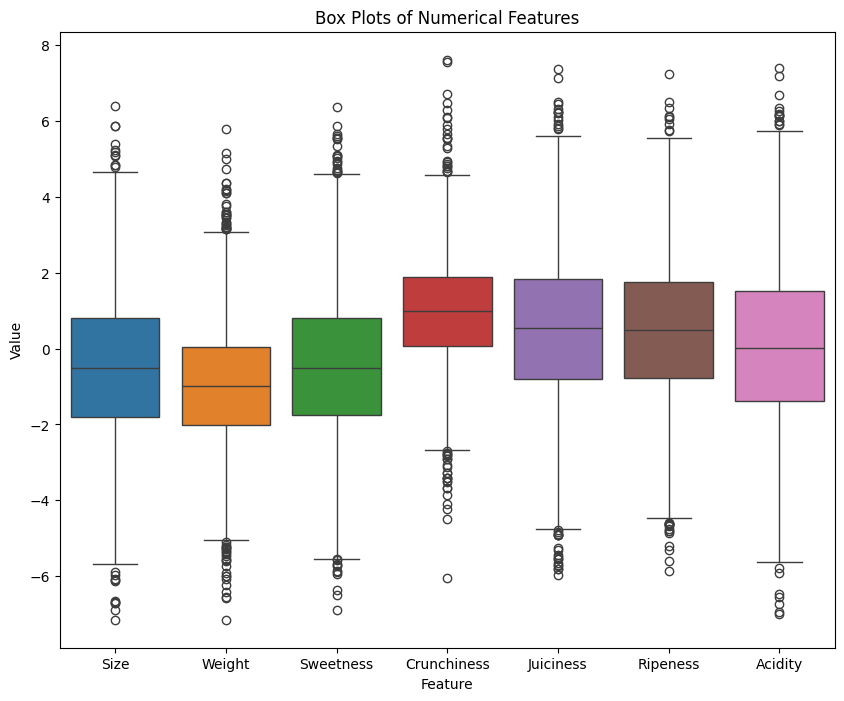

In [81]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='v')
plt.title('Box Plots of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

There is outlayer in crunchiness

# 7. **Encoding**



*  OrdinalEncoder is a preprocessing technique used in machine learning to encode categorical features with ordinal (ordered) labels into numerical values




In [82]:
from sklearn.preprocessing import OrdinalEncoder

cat_columns=df.select_dtypes(include='object').columns
cat_columns

ordinal_encoder = OrdinalEncoder(categories=[['good', 'bad']])

df['Quality'] = ordinal_encoder.fit_transform(df[['Quality']])

In [83]:
num_cols=df.columns.difference(cat_columns)
num_cols

Index(['Acidity', 'Crunchiness', 'Juiciness', 'Ripeness', 'Size', 'Sweetness',
       'Weight'],
      dtype='object')

**Heatmap after encoding**

<Axes: >

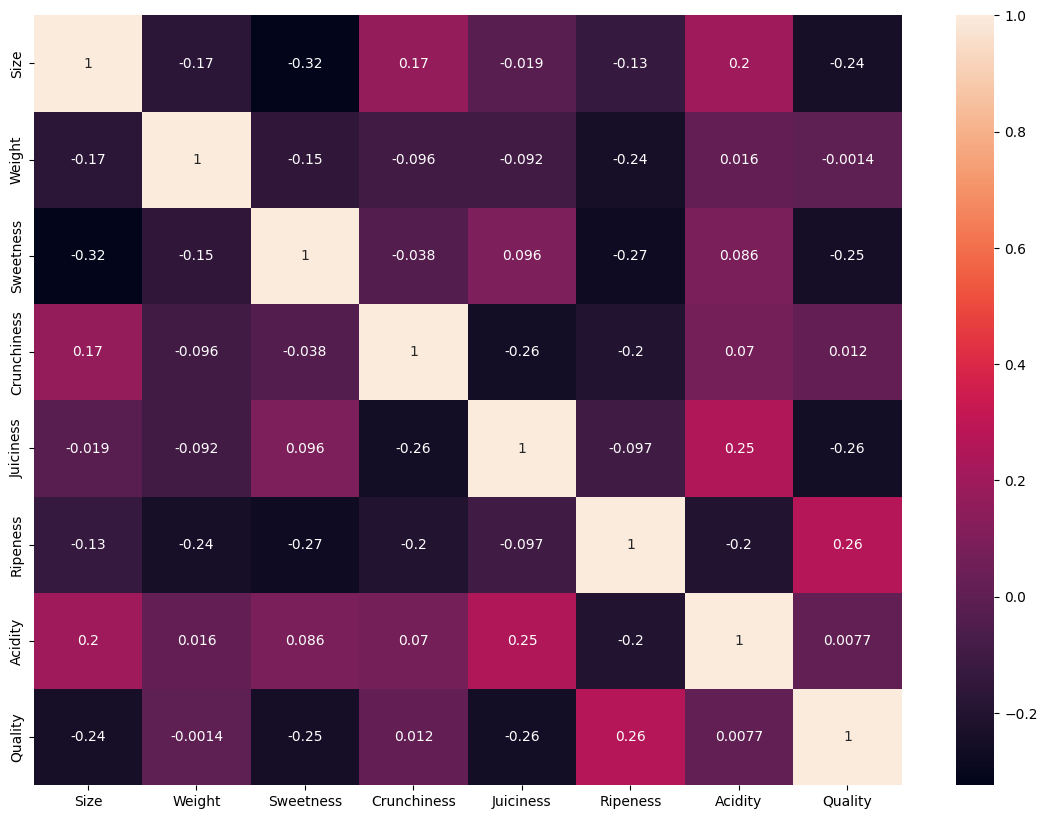

In [84]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

# 8. **Feature Scaling**

**MinMaxScaler**

*   **Normalization of feature scales**: MinMaxScaler rescales numerical features to a specified range, typically between 0 and 1. This ensures that all features have similar scales, preventing features with larger scales from dominating those with smaller scales during model training.

*   MinMaxScaler is a versatile scaling technique that helps improve the performance, stability, and interpretability of machine learning models by rescaling numerical features to a specified range.



In [85]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df[num_cols]=ms.fit_transform(df[num_cols])
df[num_cols]

,Acidity,Crunchiness,Juiciness,Ripeness,Size,Sweetness,Weight
0,0.452225,0.368781,0.585819,0.472770,0.234669,0.922484,0.358370
1,0.436185,0.558928,0.511408,0.513807,0.439331,0.795706,0.333107
2,0.668192,0.417732,0.660388,0.444693,0.505948,0.388567,0.448092
3,0.541180,0.435629,0.720370,0.187052,0.479014,0.619422,0.376971
4,0.521150,0.402347,0.674814,0.348084,0.628107,0.490589,0.452317
...,...,...,...,...,...,...,...
3995,0.495885,0.477379,0.574794,0.618866,0.531867,0.239644,0.470029
3996,0.614957,0.395971,0.449218,0.364566,0.505867,0.504203,0.703146
3997,0.393744,0.490846,0.612443,0.811182,0.333173,0.335661,0.387278
3998,0.331650,0.428137,0.609571,0.463966,0.231869,0.697913,0.415014


# 9. Data spliting




1.   x=df.drop(['Quality'],axis=1): This line creates a new DataFrame x by dropping the column labeled 'Quality' along the specified axis (axis=1). This operation removes the 'Quality' column from the DataFrame df and retains all other columns. The resulting DataFrame x contains all columns except the 'Quality' column.
2.   y=df[['Quality']]: This line creates a new DataFrame y containing only the column labeled 'Quality'. The double square brackets ([['Quality']]) are used to specify that we want to select this column as a DataFrame rather than a Series. The resulting DataFrame y contains only the 'Quality' column from the original DataFrame df.



In [86]:
x=df.drop(['Quality'],axis=1)
y=df[['Quality']]
x.shape, y.shape

((4000, 7), (4000, 1))

* In summary, x contains all columns from the original DataFrame df except the 'Quality' column, while y contains only the 'Quality' column from the original DataFrame df. These operations are commonly performed when separating features (independent variables) from the target variable (dependent variable) in preparation for machine learning tasks.







# spliting



1.   The train_test_split function from scikit-learn is used to split a dataset into two subsets: one for training a machine learning model (x_train and y_train) and one for evaluating its performance (x_test and y_test)

2.   **Evaluation of model performance**: By splitting the dataset into training and testing subsets, we can evaluate the performance of the trained model on unseen data. The testing subset (x_test and y_test) serves as a proxy for real-world data, allowing us to assess the model's generalization ability and detect overfitting.



In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [88]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [89]:
x_train.shape, y_train.shape # used to inspect the dimensions or shape of the training data.

((3200, 7), (3200, 1))

In [90]:
x_test.shape, y_test.shape #used to inspect the dimensions or shape of the testing data.

((800, 7), (800, 1))

# 10. Algorithm

# Random Forest


*  **High predictive accuracy**: Random Forest typically provides high predictive accuracy compared to many other algorithms. It works well with both categorical and numerical data and is less prone to overfitting, making it a popular choice for various predictive modeling tasks.

*   **Ensemble learning**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree is trained on a random subset of the training data and features, and predictions are made by aggregating the predictions of individual trees


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [92]:
random_forest = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=0)
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [93]:
y_pred1 = random_forest.predict(x_test)



*   y_pred1 will contain the predictions made by the trained Random Forest classifier (random_forest) on the test dataset (x_test). These predictions can be compared with the actual target variable values (y_test) to evaluate the performance of the classifier.




In [94]:
accuracy1= accuracy_score(y_test, y_pred1)
accuracy1

0.87375

# 11. Hyperparameter tuning

* **Model Performance Optimization**: Hyperparameters directly affect the performance metrics of a machine learning model. Tuning these hyperparameters can lead to significant improvements in the model's accuracy, precision, recall, F1-score, or other evaluation metrics.

# Grid Search
* Grid search is a popular technique used in hyperparameter tuning for machine learning models. It involves defining a grid of hyperparameter values and evaluating the model's performance for every possible combination of these values.

* Grid search systematically explores a predefined set of hyperparameter values, ensuring that no combination is missed. This exhaustive search approach helps in finding the best-performing set of hyperparameters within the specified search space.

In [97]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2) # Create a GridSearchCV object

grid_search.fit(x_train, y_train) # Fit the GridSearchCV object to the training data

best_params = grid_search.best_params_ # Get the best parameters

best_model = RandomForestClassifier(**best_params) # Create a new RandomForestClassifier with the best parameters

best_model.fit(x_train, y_train) # Fit the best model to the training data

# Evaluate the best model on the test data
y_pred_best = best_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Accuracy with Best Parameters:", accuracy_best)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy with Best Parameters: 0.885


#  12. classification models

# Confusion matrix

1.   **Performance evaluation**: Confusion matrices provide a comprehensive summary of the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. These counts can be used to calculate various performance metrics such as accuracy, precision, recall, F1-score, and specificity.

2.   **Error analysis**: Confusion matrices help in understanding the types of errors made by a classification model. By examining the counts in each cell of the matrix, we can identify which classes are being confused with each other and the magnitude of these errors.


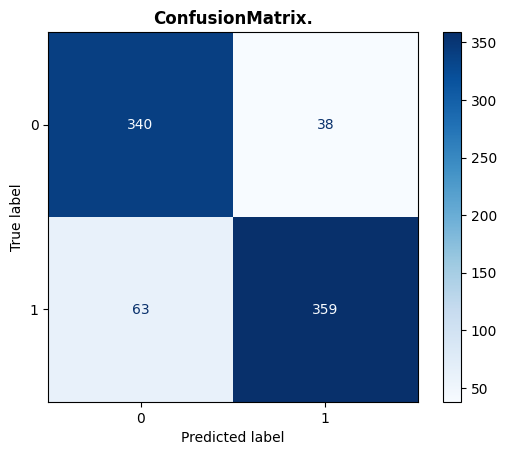

In [98]:
cm_test = confusion_matrix(y_test, y_pred1)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

# classification report

In [99]:
cr1=classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       378
         1.0       0.90      0.85      0.88       422

    accuracy                           0.87       800
   macro avg       0.87      0.88      0.87       800
weighted avg       0.88      0.87      0.87       800



# fscores

In [100]:
fscores = pd.Series(random_forest.feature_importances_, index=x_train.columns).sort_values(ascending=False)

In [101]:
fscores

Ripeness       0.177421
Size           0.156191
Juiciness      0.150530
Sweetness      0.147335
Acidity        0.130997
Weight         0.124310
Crunchiness    0.113217
dtype: float64

# Bar plot


*   Using the fscores to find out the important column and plot usiniing barplot.




In [102]:
import plotly.express as px
fig = px.bar(fscores, x=fscores.values, y=fscores.index, orientation='h',
             title='Feature Importances', labels={'y': 'Feature', 'x': 'Importance'})
fig.show()

* from the above code features we can observe that maximum important features are Ripness and size.

# 13. Receiver Operating Characteristic (ROC)

* (ROC) curves are commonly used in binary classification tasks to evaluate and visualize the performance of machine learning models

*  ROC curves are a valuable tool for evaluating and comparing classification models, aiding in threshold selection, and providing insights into model performance across different decision thresholds.





Accuracy: 0.87375
Precision: 0.9042821158690176
Recall: 0.8507109004739336
F1-Score: 0.8766788766788767
ROC-AUC Score: 0.946908147145114


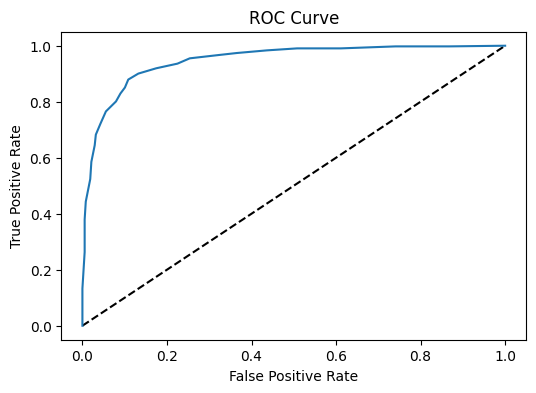

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, random_forest.predict_proba(x_test)[:, 1])


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('ROC-AUC Score:', roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 14. K-Nearest Neighbors (KNN)

*   KNN is a versatile and intuitive algorithm used for both classification and regression tasks




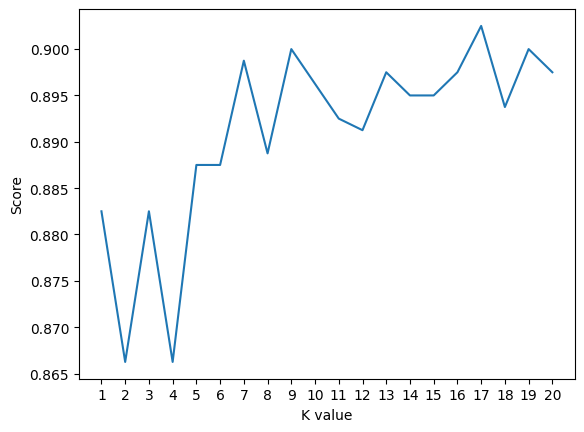

KNN best accuracy: 90.25%


In [104]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

# 15. Additional Algorithm's

# LogisticRegression
* Logistic Regression is a powerful and versatile tool for binary classification tasks, particularly when interpretability, speed, and efficiency are important considerations. However, it's essential to note that Logistic Regression has limitations, such as its inability to capture complex nonlinear relationships in the data, which may require more sophisticated models for certain tasks.

In [105]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred2=lr.predict(x_test)

In [106]:
accuracy2=accuracy_score(y_test,y_pred2)
accuracy2

0.74625

In [107]:
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       378
         1.0       0.78      0.72      0.75       422

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



# DecisionTreeClassifier
* Decision trees are easy to understand and interpret, making them valuable for gaining insights into the decision-making process of the model. The decision rules learned by the tree can be visualized, allowing users to comprehend how the model arrives at predictions.

In [108]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier(max_depth=10,criterion='gini',max_features=10,max_leaf_nodes=10)
dr.fit(x_train,y_train)
y_pred3=dr.predict(x_test)

In [109]:
accuracy3=accuracy_score(y_test,y_pred3)
accuracy3

0.71

In [110]:
cr3=classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

         0.0       0.75      0.57      0.65       378
         1.0       0.69      0.83      0.75       422

    accuracy                           0.71       800
   macro avg       0.72      0.70      0.70       800
weighted avg       0.72      0.71      0.70       800



# GaussianNB
* Gaussian Naive Bayes (GaussianNB) is a variant of the Naive Bayes algorithm

* **Simplicity**: GaussianNB is a simple and easy-to-understand classification algorithm. It's straightforward to implement and comprehend, making it a good choice for quick prototyping or as a baseline model.

* **Efficiency**: GaussianNB is computationally efficient, making it suitable for large datasets. It scales well with the number of features and samples, and the time complexity for training and prediction is linear with respect to the number of features and samples.

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

naive_b = GaussianNB()
naive_b.fit(x_train, y_train)
naive_b_pred = naive_b.predict(x_test)


In [112]:
accuracy4=metrics.accuracy_score(y_test,naive_b_pred)
accuracy4

0.75

In [113]:
cr4=classification_report(y_test,naive_b_pred)
print(cr4)

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       378
         1.0       0.78      0.73      0.75       422

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



# SVC
* Support Vector Machines (SVMs), including the Support Vector Classifier (SVC) for classification tasks.

* **Effective in High-Dimensional Spaces**: SVMs perform well in high-dimensional spaces, making them suitable for datasets with many features.

* **Versatility**: SVMs can be used for both classification and regression tasks. SVC, specifically, is designed for classification problems, allowing it to handle both binary and multi-class classification tasks.
* **Effective in Cases of Limited Data**: SVMs are effective even in cases where the number of samples is less than the number of features. This makes them useful in scenarios where data scarcity is a concern.

In [114]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',degree=5,gamma='scale')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)


In [115]:
accuracy5=metrics.accuracy_score(y_test,svc_pred)
accuracy5

0.8975

In [116]:
cr5=classification_report(y_test,svc_pred)
print(cr5)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       378
         1.0       0.94      0.86      0.90       422

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [117]:
print('The accuracy score of randomforestclassifier:',accuracy1)
print('The accuracy score of logistic regression:',accuracy2)
print('The accuracy score of decisiontreeclassifier:',accuracy3)
print("The accuracy score of KNN: {:.2f}%".format(KNAcc*100))
print('The accuracy score of Naive Bayes:',accuracy4)
print('The accuracy score of SVC:',accuracy5)

The accuracy score of randomforestclassifier: 0.87375
The accuracy score of logistic regression: 0.74625
The accuracy score of decisiontreeclassifier: 0.71
The accuracy score of KNN: 90.25%
The accuracy score of Naive Bayes: 0.75
The accuracy score of SVC: 0.8975


# 16. Cross validation

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
logreg=LogisticRegression()
print(cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean())

0.74625


In [119]:
dt=DecisionTreeClassifier(max_depth=5,criterion='gini',max_features=6)
print(cross_val_score(dt,x,y,cv=10,scoring='accuracy').mean())

0.7515000000000001


In [120]:
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5)
print(cross_val_score(rf,x,y,cv=10,scoring='accuracy').mean())

0.82825


In [121]:
knn=KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean())

0.8925000000000001
